<a href="https://colab.research.google.com/github/jyukki97/deeplearning/blob/main/doit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사 하강법

913.5973364345905 123.39414383177204
287.8416643899983


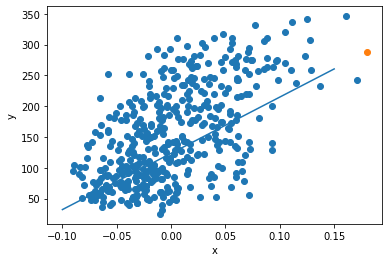

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabets = load_diabetes()

x = diabets.data[:, 2]
y = diabets.target

for i in  range(1,100):
  for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b+1*err
print(w,b)

x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

plt.scatter(x,y)
plt.scatter(x_new, y_pred)
pt1 = (-0.1, -0.1 * w +b)
pt2 = (0.15, 0.15 * w +b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# 뉴런

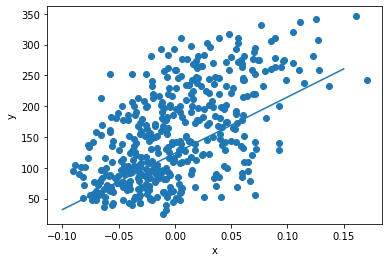

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0
  
  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat
  
  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprob(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

diabets = load_diabetes()

x = diabets.data[:, 2]
y = diabets.target

neuron = Neuron()
neuron.fit(x, y)

plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 로지스틱 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprob(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


0.8245614035087719

# 단일층 신경망

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


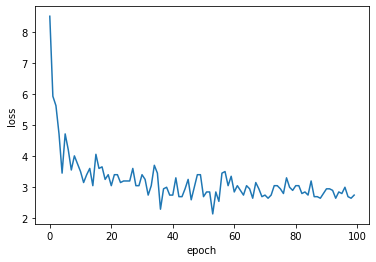

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprob(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)

        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))
      self.losses.append(loss / len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 사이킷런 경사하강법(SGDClassifier)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)


sgd = SGDClassifier(loss = 'log', random_state=42)

sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)


0.6923076923076923

# 스케일의 차이가 큰 두 특성

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


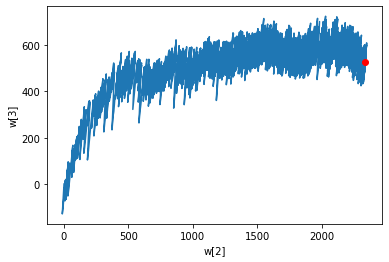

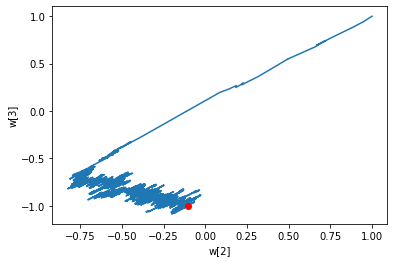

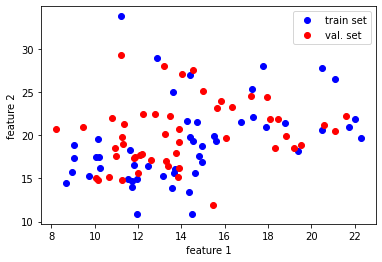

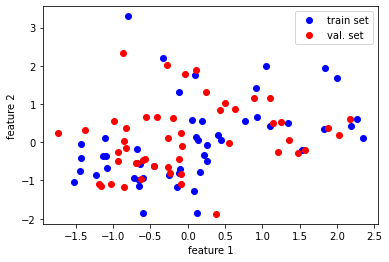

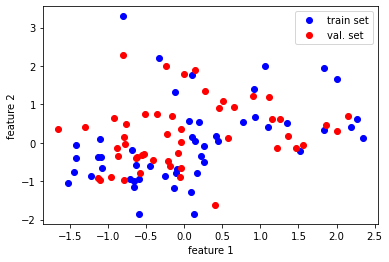

0.967032967032967

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class SingleLayer:
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprob(x[i], err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))
      self.losses.append(loss / len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)

layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

# 정규화

train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)

w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

layer2.score(x_val, y_val)  # 검증 세트의 스케일을 바꿔주지 않았기 때문에 성능이 낮게나옴

val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

# 훈련세트와 검증세트의 스케일 조절 비율이 다름
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

# 훈련세트와 검증세트의 비율을 맞춰줌
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

layer2.score(x_val_scaled, y_val)

# 과대적합 과소적합

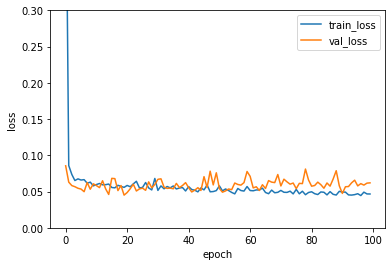

0.978021978021978

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class SingleLayer:
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprob(x[i], err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))
      self.losses.append(loss / len(y))
      self.update_val_loss(x_val, y_val)
  
  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i] * np.log(a) + (1-y_val[i]) * np.log(1 - a))
    self.val_losses.append(val_loss/len(y_val))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
layer4.score(x_val_scaled, y_val)

# L1규제 L2규제

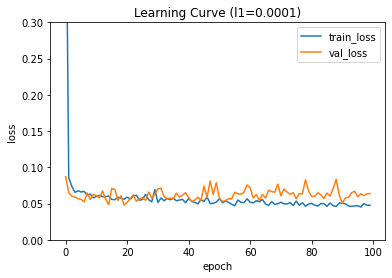

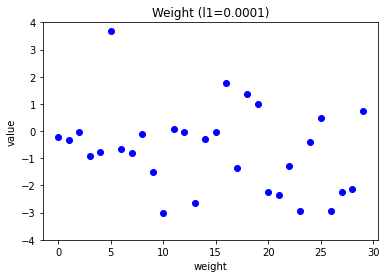

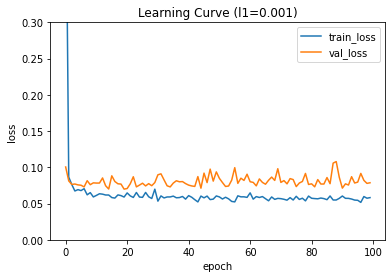

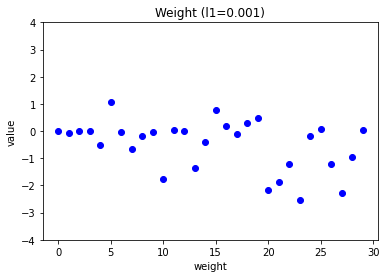

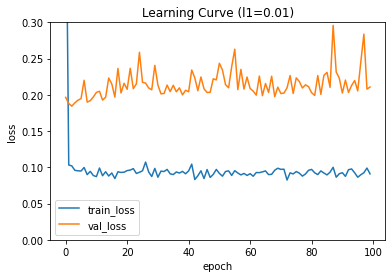

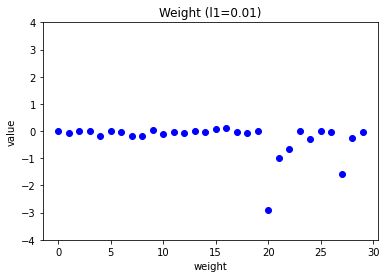

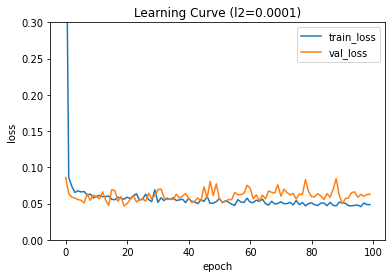

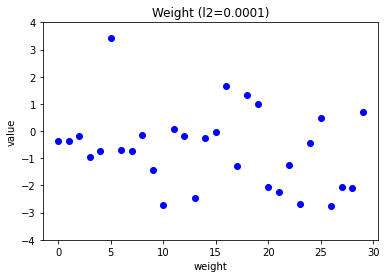

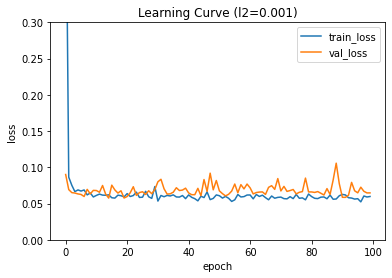

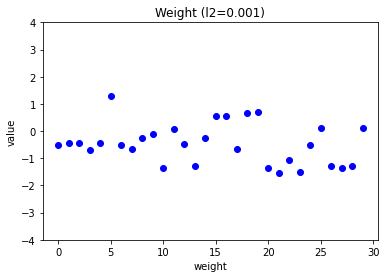

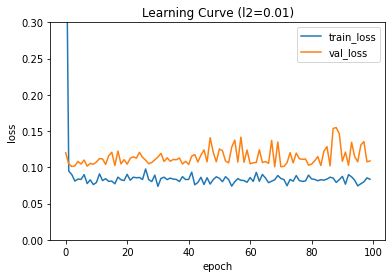

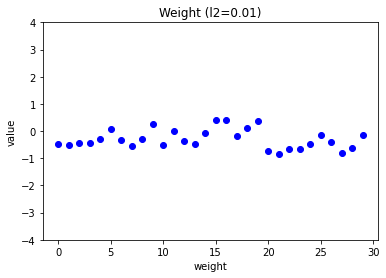

0.978021978021978

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class SingleLayer:
  def __init__(self, learning_rate = 0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprob(x[i], err)
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))
      self.losses.append(loss / len(y))
      self.update_val_loss(x_val, y_val)
  
  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)


  def update_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i] * np.log(a) + (1-y_val[i]) * np.log(1 - a))
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

l1_list = [0.0001, 0.001, 0.01]
for l1 in l1_list:
  lyr = SingleLayer(l1 = l1)
  lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

layer5 = SingleLayer(l1 = 0.001)
layer5.fit(x_train_scaled, y_train, epochs = 20)
layer5.score(x_val_scaled, y_val)

# L2
l2_list = [0.0001, 0.001, 0.01]
for l2 in l2_list:
  lyr = SingleLayer(l2 = l2)
  lyr.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2={})'.format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2={})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

layer6 = SingleLayer(l2 = 0.01)
layer6.fit(x_train_scaled, y_train, epochs = 50)
layer6.score(x_val_scaled, y_val)

# k-폴드 교차 검증

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

validation_scores = []

k = 10
bins = len(x_train) // k

for i in range(k):
  start = i * bins
  end = (i + 1) * bins
  val_fold = x_train_all[start:end]
  val_target = y_train_all[start:end]

  train_index = list(range(0, start)) + list(range(end, len(x_train)))
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  train_mean = np.mean(train_fold, axis=0)
  train_std = np.std(train_fold, axis=0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled = (val_fold - train_mean) / train_std

  lyr = SingleLayer(l2 = 0.01)
  lyr.fit(train_fold_scaled, train_target, epochs=50)
  score = lyr.score(val_fold_scaled, val_target)
  validation_scores.append(score)

print(np.mean(validation_scores))

# 사이킷런
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))
print(np.mean(scores['train_score']))

0.9583333333333333
0.9694202898550724
0.9875478561631581


# 배치 경사 하강법

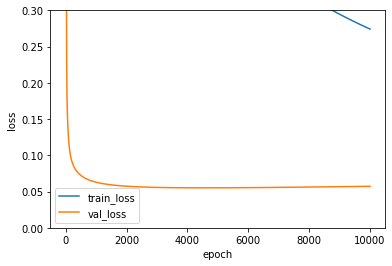

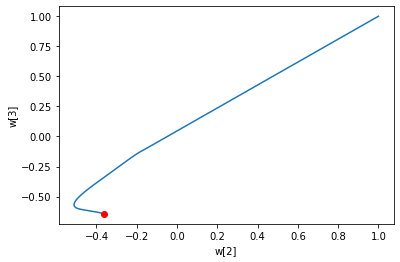

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class SingleLayer:
  def __init__(self, learning_rate = 0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2
  
  def forpass(self, x):
    z = np.dot(x, self.w) + self.b
    return z

  def backprob(self, x, err):
    m = len(x)
    w_grad = np.dot(x.T, err) / m
    b_grad = np.sum(err) / m
    return w_grad, b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    m = len(x)
    self.w = np.ones((x.shape[1], 1))
    self.b = 0
    self.w_history.append(self.w.copy())
    for i in range(epochs):
      z = self.forpass(x)
      a = self.activation(z)
      err = -(y - a)
      w_grad, b_grad = self.backprob(x, err)
      w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
      self.w -= self.lr * w_grad
      self.b -= self.lr * b_grad
      self.w_history.append(self.w.copy())
      a = np.clip(a, 1e-10, 1-1e-10)
      loss = np.sum(-(y * np.log(a) + (1 - y) * np.log(1-a)))
      self.losses.append((loss / self.reg_loss()) / m)
      self.update_val_loss(x_val, y_val)
  
  def reg_loss(self):
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)


  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.activation(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.sum(-(y_val * np.log(a) + (1-y_val) * np.log(1 - a)))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

  def predict(self, x):
    z = self.forpass(x)
    return z > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y.reshape(-1, 1))

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

single_layer = SingleLayer(l2 = 0.01)
single_layer.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val, epochs=10000)
single_layer.score(x_val_scaled, y_val)

plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

w2 = []
w3 = []
for w in single_layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()


# 2개의 층을 가진 신경망

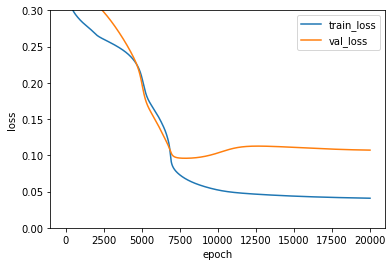

In [ ]:
class DualLayer(SingleLayer):
  def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
    self.units = units
    self.w1 = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.a1 = None
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x):
    z1 = np.dot(x, self.w1) + self.b1
    self.a1 = self.activation(z1)
    z2 = np.dot(self.a1, self.w2) + self.b2
    return z2
  
  def backprop(self, x, err):
    m = len(x)
    w2_grad = np.dot(self.a1.T, err) / m
    b2_grad = np.sum(err) / m
    err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
    w1_grad = np.dot(x.T, err_to_hidden) / m
    b1_grad = np.sum(err_to_hidden, axis=0) / m
    return w1_grad, b1_grad, w2_grad, b2_grad

  def init_weights(self, n_features):
    self.w1 = np.ones((n_features, self.units))
    self.b1 = np.zeros(self.units)
    self.w2 = np.ones((self.units, 1))
    self.b2 = 0

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    m = len(x)
    self.init_weights(x.shape[1])
    for i in range(epochs):
      a = self.training(x, y, m)
      a = np.clip(a, 1e-10, 1-1e-10)
      loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
      self.losses.append((loss + self.reg_loss()) / m)
      self.update_val_loss(x_val, y_val)

  def training(self, x, y, m):
    z = self.forpass(x)
    a = self.activation(z)
    err = -(y - a)
    w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
    w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
    w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
    self.w1 -= self.lr * w1_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
    return a

  def reg_loss(self):
    return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
            self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

dual_layer = DualLayer(l2 = 0.01)
dual_layer.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# 가중치 초기화 개선

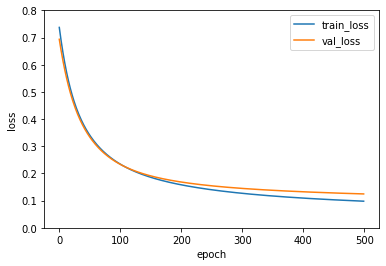

In [ ]:
class RandomInitNetwork(DualLayer):
  def init_weights(self, n_features):
    np.random.seed(42)
    self.w1 = np.random.normal(0, 1, (n_features, self.units))
    self.b1 = np.zeros(self.units)
    self.w2 = np.random.normal(0, 1, (self.units, 1))
    self.b2 = 0

random_init_net = RandomInitNetwork(l2=0.01)
random_init_net.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val, epochs=500)

plt.ylim(0, 0.8)
plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()


# 미니 배치 경사 하강법

0.978021978021978


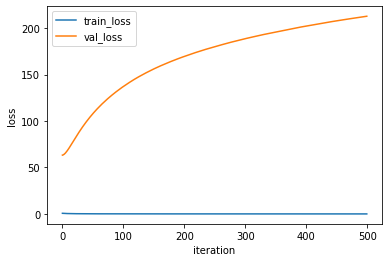

In [ ]:
class MinibatchNetwork(RandomInitNetwork):
  def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
    super().__init__(units, learning_rate, l1, l2)
    self.batch_size = batch_size
  
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y = y.reshape(-1, 1)
    self.init_weights(x.shape[1])
    np.random.seed(42)
    for i in range(epochs):
      loss = 0
      for x_batch, y_batch in self.gen_batch(x, y):
        y_batch = y_batch.reshape(-1, 1)
        m = len(x_batch)
        a = self.training(x_batch, y_batch, m)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += np.sum(-(y_batch*np.log(a) + (1-y_batch) * np.log(1-a)))
      self.losses.append((loss + self.reg_loss()) / len(x))
      self.update_val_loss(x_val, y_val)
    
  def gen_batch(self, x, y):
    length = len(x)
    bins = length // self.batch_size 
    if length % self.batch_size:
      bins += 1
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]

minibatch_net = MinibatchNetwork(l2 = 0.01, batch_size=128)
minibatch_net.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val, epochs=500)
print(minibatch_net.score(x_val_scaled, y_val))

plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# 사이킷런 다층신경망

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, ), activation='logistic', solver='sgd', alpha=0.01, batch_size=32,
                    learning_rate_init=0.1, max_iter=500)
mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

0.989010989010989

# 다중 분류 신경망 - 소프트맥스 함수 추가

In [ ]:
class MultiClassNetwork:
  def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
    self.units = units
    self.batch_size = batch_size
    self.w1 = None
    self.b1 = None
    self.w2 = None
    self.b2 = None
    self.a1 = None
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x):
    z1 = np.dot(x, self.w1) + self.b1
    self.a1 = self.sigmoid(z1)
    z2 = np.dot(self.a1, self.w2) + self.b2
    return z2

  def backprop(self, x, err):
    m = len(x)
    w2_grad = np.dot(self.a1.T, err) / m
    b2_grad = np.sum(err) / m
    err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
    w1_grad = np.dot(x.T, err_to_hidden) / m
    b1_grad = np.sum(err_to_hidden, axis=0) / m
    return w1_grad, b1_grad, w2_grad, b2_grad

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def softmax(self, z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)

  def init_weights(self, n_features, n_classes):
    self.w1 = np.random.normal(0, 1, (n_features, self.units))
    self.b1 = np.zeros(self.units)
    self.w2 = np.random.normal(0, 1, (self.units, n_classes))
    self.b2 = np.zeros(n_classes)

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    np.random.seed(42)
    self.init_weights(x.shape[1], y.shape[1])
    for i in range(epochs):
      loss = 0
      print('.', end='')
      for x_batch, y_batch in self.gen_batch(x, y):
        a = self.training(x_batch, y_batch)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += np.sum(-y_batch*np.log(a))
      self.losses.append((loss + self.reg_loss()) / len(x))
      self.update_val_loss(x_val, y_val)

  def gen_batch(self, x, y):
    length = len(x)
    bins = length // self.batch_size
    if length % self.batch_size:
      bins += 1
    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]
      
  def training(self, x, y):
    m = len(x)
    z = self.forpass(x)
    a = self.softmax(z)
    err = -(y - a)
    w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
    w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
    w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
    
    self.w1 -= self.lr * w1_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
    return a

  def predict(self, x):
    z = self.forpass(x)
    return np.argmax(z, axis=1)

  def score(self, x, y):
    return np.mean(self.predict(x) == np.argmax(y, axis=1))

  def reg_loss(self):
    return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
            self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.softmax(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.sum(-y_val*np.log(a))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))
    

# 의류이미지 분류

(48000, 10) (12000, 10)
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
........................................

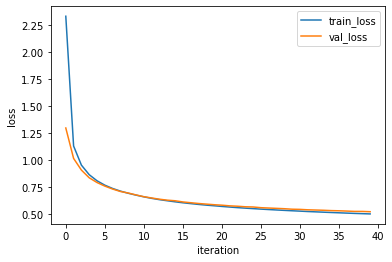

0.8150833333333334

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

x_train = x_train / 255
x_val = x_val / 255

x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

# 원-핫 인코딩
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

print(y_train_encoded.shape, y_val_encoded.shape)
print(y_train[0], y_train_encoded[0])

fc = MultiClassNetwork(units=100, batch_size=256)
fc.fit(x_train, y_train_encoded, x_val=x_val, y_val=y_val_encoded, epochs=40)

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

fc.score(x_val, y_val_encoded)

# 케라스 다중 분류 신경망

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7220 - accuracy: 0.5485 - val_loss: 0.9459 - val_accuracy: 0.7340
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8832 - accuracy: 0.7402 - val_loss: 0.7442 - val_accuracy: 0.7644
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7250 - accuracy: 0.7649 - val_loss: 0.6595 - val_accuracy: 0.7818
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6558 - accuracy: 0.7785 - val_loss: 0.6092 - val_accuracy: 0.7962
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6128 - accuracy: 0.7903 - val_loss: 0.5752 - val_accuracy: 0.8025
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5736 - accuracy: 0.8025 - val_loss: 0.5488 - val_accuracy: 0.8121
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5554 - accuracy: 0.8092 - val_loss: 0.5286 - val_accuracy:

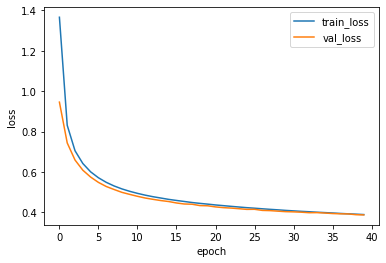

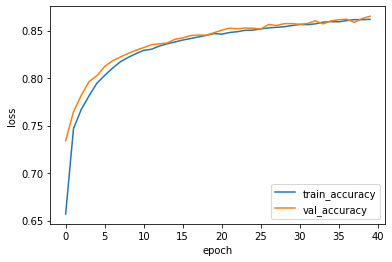

0.8650000095367432


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100, activation='sigmoid', input_shape = (784,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_encoded, epochs=40, validation_data=(x_val, y_val_encoded))

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print(accuracy)

# 합성곱

In [3]:
import numpy as np
from scipy.signal import convolve

w = np.array([2,1,5,3])
x = np.array([2,8,3,7,1,2,0,4,5])

convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

# 교차 상관

In [4]:
import numpy as np
from scipy.signal import correlate

w = np.array([2,1,5,3])
x = np.array([2,8,3,7,1,2,0,4,5])

correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

# 텐서플로 합성곱

In [8]:
import tensorflow as tf

x = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
w = np.array([[2,0], [0,0]])
x_4d = x.astype(np.float).reshape(1,3,3,1)
w_4d = w.reshape(2,2,1,1)

c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')

c_out.numpy().reshape(3,3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

# 최대 풀링

In [13]:
x = np.array([[1,2,3,4],
             [5,6,7,8],
             [9,10,11,12],
              [13,14,15,16]])

x = x.reshape(1,4,4,1)

p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID')
p_out.numpy().reshape(2,2)

array([[ 6.,  8.],
       [14., 16.]], dtype=float32)

# 렐루(ReLU)

In [16]:
def relu(x):
  return np.maximum(x, 0)

x = np.array([-1,2,-3,4,-5])
relu(x)

r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])